In [8]:
import cv2

In [9]:
class car:
    center = {}
    speed = {}
    angle = {}
    frame = {}
    

In [10]:
cap = cv2.VideoCapture('road.mp4')

In [11]:
ret, frame = cap.read()

In [12]:
dict_car = {}

In [15]:
car1 = car()

In [16]:
dict_center = {}
dict_radius = {}
temp = 0
dict_car = {}

In [63]:
# import the necessary packages
from collections import deque
import operator
import numpy as np
import argparse
import imutils
import cv2
from math import atan2, degrees, pi

class car:
    center = []
    speed = []
    angle = []
    frame = []
    count = 0
def distance((x1,y1),(x2,y2)):
    
    return np.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))

def angle((x1,y1),(x2,y2)):
    dx = x2 - x1
    dy = y2 - y1
    rads = atan2(dy,dx)
    rads %= 2*pi
    degs = degrees(rads)
    return degs

# construct the argument parse and parse the arguments
#args['buffer'] =64

# define the lower and upper boundaries of the "green"
# ball in the HSV color space, then initialize the
# list of tracked points
#greenLower = (100, 66, 6)
#greenUpper = (200, 255, 255)

#correct for some cars
#greenLower = (35, 30, 90)
#greenUpper = (250, 250, 205)


greenLower = (30, 30, 40)
greenUpper = (250, 250, 205)

pts = {}
dict_center = {}
dict_radius = {}
dict_car = {}
dist = {}
match = {}
temp = 0

for i in range(0,300):
    pts[i] = deque(maxlen=64)

camera = cv2.VideoCapture("IMG_1254_cut.mp4")
fgbg = cv2.createBackgroundSubtractorMOG2()

fps = camera.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc('D','I','V','X')
#video = cv2.VideoWriter('output.avi',fourcc, fps, (1920,1080),1)




# keep looping



while True:
    # grab the current frame
    (grabbed, frame) = camera.read()
    
    # if we are viewing a video and we did not grab a frame,
    # then we have reached the end of the video
    if not grabbed:
        break

    # resize the frame, blur it, and convert it to the HSV
    # color space
#frame = imutils.resize(frame, width=600)
    frame = imutils.resize(frame, width=400)
    fgmask = fgbg.apply(frame)
#frame = fgmask
    # blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# construct a mask for the color "green", then perform
# a series of dilations and erosions to remove any small
# blobs left in the mask

    mask = cv2.inRange(hsv, greenLower, greenUpper)
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)
    
    # find contours in the mask and initialize the current
    # (x, y) center of the ball
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    #initialize parameters, saving in dictionary
    center = {}
    c = {}
    radius = {}
    # only proceed if at least one contour was found
    if len(cnts) > 0:
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
        # find all contour instead
        for i in range(0,len(cnts)):
            c[i] = cnts[i]
            ((x, y), radius[i]) = cv2.minEnclosingCircle(c[i])
            M = cv2.moments(c[i])
            center[i] = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
            # only proceed if the radius meets a minimum size
            
            cv2.circle(frame, (int(x), int(y)), int(radius[i]),(0, 255, 255), 2)
            cv2.circle(frame, center[i], 5, (0, 0, 255), -1)
    dict_center[temp] = center.copy()
    dict_radius[temp] = radius.copy()
    #loop from 2, avoid error
    if temp>2:
        #loop for every frame
        for i in range(0, len(dict_center[temp-1])):
            #loop for every center
            
            dist[i] = {}
            for k in dict_center[temp]:
                dist[i][k] = distance(dict_center[temp-1][i], dict_center[temp][k])
            match[i] = min(dist[i].iteritems(), key=operator.itemgetter(1))[0]
            if distance(dict_center[temp-1][i], dict_center[temp][match[i]]) <20:
                myangle = angle(dict_center[temp-1][i], dict_center[temp][match[i]])
                if (myangle >70 and myangle < 110) or ((myangle>250) and (myangle<290)):
                    #(myangle >70 and myangle < 110) or ((myangle>250) and (myangle<290)):
                    if (distance(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034 > 2:
                        if ((dict_radius[temp-1][i] / dict_radius[temp][match[i]])>0.85 and (dict_radius[temp-1][i] / dict_radius[temp][match[i]])<1.15):
                            #and (dict_radius[temp-1][i]>10) and (dict_radius[temp][match[i]]>10):
                            cv2.line(frame, dict_center[temp-1][i], dict_center[temp][match[i]], (0, 0, 255),5)
                            #now we have a new center:dict_center[temp][match[i]] which connected to dict_center[temp-1][i]
                            if (dict_center[temp-1][i][0]>166) and (dict_center[temp-1][i][0]<333):
                                if len(dict_car) == 0:
                                    dict_car[0] = {}
                                    dict_car[0]['center'] = []
                                    dict_car[0]['speed'] = []
                                    dict_car[0]['angle'] = []
                                    dict_car[0]['frame'] = []
                                    dict_car[0]['radius'] = []
                                    dict_car[0]['center'].append(dict_center[temp][match[i]])
                                    dict_car[0]['radius'].append(dict_radius[temp][match[i]])
                                    dict_car[0]['speed'].append((distance(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.01)
                                    dict_car[0]['angle'].append((angle(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.01)
                                    dict_car[0]['frame'].append(temp)
                                    dict_car[0]['count'] = 1
                                else:
                                    found = 0
                                    for m in dict_car:
                                        for j in range(0,dict_car[m]['count']):
                                            if (distance(dict_center[temp][match[i]], dict_car[m]['center'][j]) < 50) and (np.abs(temp - dict_car[m]['frame'][j])<5):
                                                dict_car[m]['center'].append(dict_center[temp][match[i]])
                                                dict_car[m]['radius'].append(dict_radius[temp][match[i]])
                                                dict_car[m]['speed'].append((distance(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.01)
                                                dict_car[m]['angle'].append((angle(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.01)
                                                dict_car[m]['frame'].append(temp)
                                                dict_car[m]['count'] +=1
                                                found = 1
                                                print dict_center[temp][match[i]]
                                                print dict_car[m]['center'][j]
                                                print temp
                                                #print dict_car[m]['frame'][j]
                                                #print m
                                                break
                                    if found ==0:
                                        current_len = len(dict_car)
                                        #create new car
                                        dict_car[current_len] = {}
                                        dict_car[current_len]['center'] = []
                                        dict_car[current_len]['speed'] = []
                                        dict_car[current_len]['angle'] = []
                                        dict_car[current_len]['radius'] = []
                                        dict_car[current_len]['frame'] = []
                                        dict_car[current_len]['count'] = 0
                                        #add features
                                        dict_car[current_len]['center'].append(dict_center[temp][match[i]])
                                        dict_car[current_len]['radius'].append(dict_radius[temp][match[i]])
                                        dict_car[current_len]['speed'].append((distance(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.01)
                                        dict_car[current_len]['angle'].append((angle(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.01)
                                        dict_car[current_len]['frame'].append(temp)
                                        dict_car[current_len]['count'] +=1
                                    #print ("center: ") + str(dict_center[temp][match[i]])
                                    #print ("speed: ") + str((distance(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034)
                                    #print ("angle: ") + str((angle(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034)
                                    #print ("frame: ") + str(temp)

#mycode
#video.write(frame)
# show the frame to our screen
    frame = imutils.resize(frame, width=400)
    mask = imutils.resize(mask, width=400)
    #cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    
    # if the 'q' key is pressed, stop the loop
    if key == ord("q"):
        break
    temp +=1

# cleanup the camera and close any open windows
camera.release()
#video.release()
cv2.destroyAllWindows()


(191, 295)
(190, 299)
44
(190, 307)
(189, 311)
55
(281, 675)
(275, 702)
59
(276, 697)
(275, 702)
60
(290, 698)
(275, 702)
60
(189, 314)
(188, 318)
61
(288, 686)
(275, 702)
62
(275, 687)
(275, 702)
62
(189, 317)
(188, 318)
62
(276, 683)
(275, 702)
63
(280, 667)
(275, 702)
63
(187, 323)
(188, 318)
63
(284, 686)
(288, 686)
66
(279, 655)
(288, 686)
66
(187, 327)
(189, 317)
66
(279, 647)
(276, 683)
67
(279, 647)
(276, 683)
67
(187, 330)
(187, 323)
67
(191, 317)
(187, 323)
67
(282, 629)
(279, 655)
68
(188, 327)
(187, 327)
68
(282, 639)
(284, 686)
69
(281, 624)
(279, 655)
69
(288, 673)
(284, 686)
70
(285, 652)
(284, 686)
70
(272, 637)
(279, 655)
70
(280, 661)
(279, 647)
71
(272, 633)
(279, 647)
71
(187, 334)
(188, 327)
72
(195, 280)
(188, 327)
72
(279, 609)
(285, 652)
74
(283, 628)
(279, 609)
77
(279, 594)
(279, 609)
77
(277, 587)
(283, 628)
79
(285, 615)
(283, 628)
81
(279, 576)
(279, 594)
81
(287, 586)
(277, 587)
83
(288, 598)
(285, 615)
84
(287, 580)
(285, 615)
84
(275, 560)
(279, 576)
84


(205, 241)
(208, 219)
489
(195, 258)
(206, 237)
492
(200, 267)
(195, 258)
494
(200, 270)
(195, 258)
495
(200, 282)
(200, 267)
497
(199, 285)
(200, 267)
498
(199, 290)
(200, 270)
499
(187, 302)
(199, 285)
502
(186, 305)
(199, 290)
503
(184, 318)
(187, 302)
506
(200, 324)
(186, 305)
507
(183, 321)
(186, 305)
507
(199, 327)
(184, 318)
508
(182, 324)
(184, 318)
508
(222, 9)
(218, 8)
508
(181, 327)
(184, 318)
509
(196, 333)
(184, 318)
510
(181, 331)
(184, 318)
510
(223, 18)
(222, 9)
510
(222, 26)
(222, 9)
511
(186, 341)
(199, 327)
512
(183, 347)
(196, 333)
514
(183, 350)
(186, 341)
515
(221, 46)
(222, 26)
515
(233, 30)
(222, 26)
515
(221, 57)
(221, 46)
516
(180, 358)
(183, 347)
517
(222, 60)
(221, 46)
517
(233, 43)
(221, 46)
517
(180, 361)
(183, 347)
518
(222, 65)
(221, 46)
518
(221, 75)
(221, 57)
520
(176, 372)
(180, 358)
521
(221, 82)
(222, 60)
521
(176, 375)
(180, 361)
522
(221, 87)
(222, 65)
522
(221, 92)
(221, 75)
523
(221, 119)
(221, 115)
529
(221, 132)
(221, 115)
531
(222, 135)
(221,

In [65]:
mask.shape()

TypeError: 'tuple' object is not callable

In [66]:
mask.shape

(711, 400)

In [67]:
fgmask.shape

(711, 400)

In [68]:
countlist = []
for i in range(0,len(dict_car)):
    if len(dict_car[i]['center'])>30:
        countlist.append(i)

In [69]:
countlist

[7, 15, 16, 17, 19, 21]

In [70]:
import pandas as pd

In [71]:
data = {}
speed = {}
data[0] = pd.DataFrame.from_dict(dict_car[0])
dataall = data[0][data[0]['radius']>5].groupby('frame').mean()
for i in countlist:
    data[i] = pd.DataFrame.from_dict(dict_car[i])
    speed[i] = data[i][data[i]['radius']>1].groupby('frame').mean()
    dataall = dataall.append(speed[i])

In [72]:
dict_car[301]

KeyError: 301

In [73]:
dataall.shape

(314, 4)

In [74]:
import pandas as pd

In [75]:
dataall = speed1.append(speed2).append(speed3).append(speed4).append(speed5)

NameError: name 'speed1' is not defined

In [76]:
from matplotlib import pyplot as plt

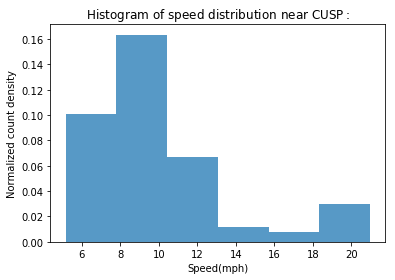

In [85]:

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = dataall[dataall['speed']]['speed'].values * 6.92415

# the histogram of the data
n, bins, patches = plt.hist(x, 6, normed=1, alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Speed(mph)')
plt.ylabel('Normalized count density')
plt.title(r'$\mathrm{Histogram\ of\ speed\ distribution\ near\ CUSP:}$')
#plt.axis([40, 160, 0, 0.03])

plt.show()

In [87]:
x.mean()

10.013421947626336

In [83]:
dataall['speed'].mean()*6.92415

10.503521684904033

In [111]:
from sklearn.metrics import r2_score

In [175]:
x = [5.5,8.8,5.7,10,10.5]

In [176]:
y = [5.2,8.9,5.3,13.57,10.2]

In [177]:
r2_score(x,y)

0.4148838248436103

In [122]:
max(dataall['speed']) * 3.3 * 2.23

28.963976532889635

In [192]:
dict_car[1]

{'angle': [289.0824482639782],
 'center': [(361, 180)],
 'count': 1,
 'frame': [14],
 'speed': [2.676383209996597]}

In [181]:

class car:
    center = []
    speed = []
    angle = []
    frame = []
    count = 0

In [182]:
CopyOfCar = type('CopyOfCar', car.__bases__, dict(car.__dict__))

In [183]:
dict_car[0] = CopyOfCar()

In [185]:
dict_car[0].center.append(1)

In [186]:
car.center

[1]

In [171]:
dict_car[1] = type('CopyOfa', car.__bases__, dict(car.__dict__))

In [172]:
dict_car[1].center

[1]

In [142]:
test1 = car()

In [161]:
car().center

[(130, 155),
 (361, 180),
 (191, 289),
 (192, 285),
 (128, 158),
 (192, 290),
 (132, 154),
 (82, 45),
 (192, 289),
 (82, 324),
 (190, 296),
 (192, 292),
 (190, 299),
 (191, 295),
 (358, 168),
 (155, 155),
 (281, 701),
 (284, 705),
 (197, 250),
 (189, 311),
 (190, 307),
 (188, 312),
 (190, 310),
 (197, 256),
 (93, 93),
 (275, 702),
 (281, 675),
 (276, 697),
 (290, 698),
 (188, 318),
 (189, 314),
 (288, 686),
 (275, 687),
 (189, 317),
 (197, 263),
 (93, 93),
 (276, 683),
 (280, 667),
 (187, 323),
 (189, 320),
 (92, 319),
 (90, 209),
 (284, 686),
 (279, 655),
 (187, 327),
 (355, 166),
 (279, 647),
 (279, 647),
 (187, 330),
 (92, 319),
 (191, 317),
 (282, 629),
 (188, 327),
 (286, 656),
 (282, 639),
 (281, 624),
 (288, 673),
 (285, 652),
 (272, 637),
 (280, 661),
 (280, 661),
 (272, 633),
 (277, 619),
 (187, 334),
 (195, 280),
 (288, 647),
 (362, 280),
 (279, 609),
 (283, 628),
 (279, 594),
 (285, 630),
 (277, 587),
 (285, 615),
 (279, 576),
 (183, 355),
 (192, 301),
 (287, 586),
 (288, 59

In [146]:
class B(object):
    x = 3

CopyOfB = type('CopyOfB', B.__bases__, dict(B.__dict__))

b = B()
cob = CopyOfB()

In [157]:
CopyOfB = type('CopyOfB', car.__bases__, dict(car.__dict__))

In [158]:
CopyOfB

[(130, 155),
 (361, 180),
 (191, 289),
 (192, 285),
 (128, 158),
 (192, 290),
 (132, 154),
 (82, 45),
 (192, 289),
 (82, 324),
 (190, 296),
 (192, 292),
 (190, 299),
 (191, 295),
 (358, 168),
 (155, 155),
 (281, 701),
 (284, 705),
 (197, 250),
 (189, 311),
 (190, 307),
 (188, 312),
 (190, 310),
 (197, 256),
 (93, 93),
 (275, 702),
 (281, 675),
 (276, 697),
 (290, 698),
 (188, 318),
 (189, 314),
 (288, 686),
 (275, 687),
 (189, 317),
 (197, 263),
 (93, 93),
 (276, 683),
 (280, 667),
 (187, 323),
 (189, 320),
 (92, 319),
 (90, 209),
 (284, 686),
 (279, 655),
 (187, 327),
 (355, 166),
 (279, 647),
 (279, 647),
 (187, 330),
 (92, 319),
 (191, 317),
 (282, 629),
 (188, 327),
 (286, 656),
 (282, 639),
 (281, 624),
 (288, 673),
 (285, 652),
 (272, 637),
 (280, 661),
 (280, 661),
 (272, 633),
 (277, 619),
 (187, 334),
 (195, 280),
 (288, 647),
 (362, 280),
 (279, 609),
 (283, 628),
 (279, 594),
 (285, 630),
 (277, 587),
 (285, 615),
 (279, 576),
 (183, 355),
 (192, 301),
 (287, 586),
 (288, 59

In [151]:
cob.x = 2

In [152]:
cob2 = CopyOfB()

In [153]:
cob2.x

3

In [138]:
test2.center

[(130, 155),
 (361, 180),
 (191, 289),
 (192, 285),
 (128, 158),
 (192, 290),
 (132, 154),
 (82, 45),
 (192, 289),
 (82, 324),
 (190, 296),
 (192, 292),
 (190, 299),
 (191, 295),
 (358, 168),
 (155, 155),
 (281, 701),
 (284, 705),
 (197, 250),
 (189, 311),
 (190, 307),
 (188, 312),
 (190, 310),
 (197, 256),
 (93, 93),
 (275, 702),
 (281, 675),
 (276, 697),
 (290, 698),
 (188, 318),
 (189, 314),
 (288, 686),
 (275, 687),
 (189, 317),
 (197, 263),
 (93, 93),
 (276, 683),
 (280, 667),
 (187, 323),
 (189, 320),
 (92, 319),
 (90, 209),
 (284, 686),
 (279, 655),
 (187, 327),
 (355, 166),
 (279, 647),
 (279, 647),
 (187, 330),
 (92, 319),
 (191, 317),
 (282, 629),
 (188, 327),
 (286, 656),
 (282, 639),
 (281, 624),
 (288, 673),
 (285, 652),
 (272, 637),
 (280, 661),
 (280, 661),
 (272, 633),
 (277, 619),
 (187, 334),
 (195, 280),
 (288, 647),
 (362, 280),
 (279, 609),
 (283, 628),
 (279, 594),
 (285, 630),
 (277, 587),
 (285, 615),
 (279, 576),
 (183, 355),
 (192, 301),
 (287, 586),
 (288, 59

In [132]:
dict_car[0].center[0:5]

[(130, 155), (361, 180), (191, 289), (192, 285), (128, 158)]

In [133]:
dict_car[1].center[0:5]

[(130, 155), (361, 180), (191, 289), (192, 285), (128, 158)]

In [108]:
#for j in range(0,dict_car[m].count):
if (distance(dict_center[temp][match[i]], dict_car[m].center[j]) < 20) and (np.abs(temp - dict_car[m].frame[j])<5):
    dict_car[m].center.append(dict_center[temp][match[i]])
    dict_car[m].speed.append((distance(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034)
    dict_car[m].angle.append((angle(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034)
    dict_car[m].frame.append(temp)
    dict_car[m].count +=1
    found = 1

In [112]:
dict_center[temp][match[i]]

(370, 163)

In [110]:
dict_car[m].center[j]

(130, 155)

In [124]:
len(dict_car[0].center)

875

In [95]:
dict_car[0].frame

[7,
 14,
 19,
 20,
 24,
 25,
 25,
 34,
 36,
 39,
 40,
 41,
 43,
 44,
 47,
 48,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 57,
 58,
 59,
 59,
 60,
 60,
 60,
 61,
 62,
 62,
 62,
 62,
 62,
 63,
 63,
 63,
 64,
 65,
 65,
 66,
 66,
 66,
 66,
 67,
 67,
 67,
 67,
 67,
 68,
 68,
 69,
 69,
 69,
 70,
 70,
 70,
 71,
 71,
 71,
 72,
 72,
 72,
 73,
 73,
 74,
 77,
 77,
 78,
 79,
 81,
 81,
 82,
 82,
 83,
 84,
 84,
 84,
 84,
 85,
 87,
 87,
 87,
 88,
 89,
 90,
 90,
 90,
 91,
 92,
 92,
 93,
 93,
 93,
 94,
 95,
 95,
 95,
 95,
 96,
 96,
 96,
 97,
 97,
 97,
 98,
 99,
 99,
 99,
 99,
 100,
 102,
 102,
 102,
 103,
 103,
 103,
 104,
 104,
 105,
 106,
 106,
 107,
 108,
 109,
 109,
 111,
 111,
 111,
 111,
 112,
 112,
 113,
 114,
 115,
 116,
 116,
 117,
 119,
 120,
 120,
 121,
 122,
 122,
 123,
 123,
 124,
 125,
 125,
 125,
 127,
 127,
 129,
 129,
 131,
 132,
 132,
 133,
 133,
 134,
 134,
 135,
 135,
 135,
 136,
 137,
 137,
 137,
 137,
 137,
 139,
 140,
 141,
 141,
 141,
 142,
 142,
 143,
 143,
 144,
 144,
 145,
 145,
 14

In [82]:
temp = 11

In [83]:
tempcenter = (130, 150)
for m in dict_car:
    for j in range(0,dict_car[m].count):
        if (distance(tempcenter, dict_car[m].center[j]) < 20) and (np.abs(temp - dict_car[m].frame[j])<5):
            dict_car[m].center.append(dict_center[temp][match[i]])
            dict_car[m].speed.append((distance(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034)
            dict_car[m].angle.append((angle(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034)
            dict_car[m].frame.append(temp)
            dict_car.count +=1
            break
            

1


In [84]:
np.abs(temp - dict_car[m].frame[j])

4

In [74]:
dict_car[0]

<__main__.car instance at 0x10bef05a8>

In [69]:
np.abs(frame - dict_car[m].frame[j])

array([[[111, 123, 128],
        [109, 121, 126],
        [109, 121, 126],
        ..., 
        [116, 125, 139],
        [119, 129, 141],
        [122, 131, 144]],

       [[110, 122, 127],
        [105, 117, 121],
        [108, 120, 125],
        ..., 
        [119, 128, 142],
        [120, 129, 141],
        [121, 131, 143]],

       [[111, 123, 128],
        [109, 121, 126],
        [110, 122, 127],
        ..., 
        [121, 133, 144],
        [119, 131, 141],
        [119, 131, 141]],

       ..., 
       [[125, 139, 144],
        [127, 141, 146],
        [127, 139, 144],
        ..., 
        [105, 114, 116],
        [100, 108, 111],
        [102, 109, 114]],

       [[125, 139, 144],
        [124, 138, 143],
        [124, 136, 141],
        ..., 
        [111, 119, 121],
        [102, 110, 112],
        [102, 110, 114]],

       [[124, 138, 143],
        [124, 138, 143],
        [126, 138, 143],
        ..., 
        [113, 122, 123],
        [108, 117, 118],
        [104, 112,

In [63]:
dict_car[0].count

1

In [52]:
for m in range (0,2):
    dict_car[m] = car()
    dict_car[m].center = dict_center[temp][match[i]]
    dict_car[m].speed = (distance(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034
    dict_car[m].angle = (angle(dict_center[temp-1][i], dict_center[temp][match[i]])*fps)*0.034
    dict_car[m].frame = temp

In [38]:
dict_car

{0: <__main__.car instance at 0x102670830>,
 1: <__main__.car instance at 0x1026703b0>}

In [45]:
for j in dict_car:
    a = dict_car[j]

In [46]:
a

<__main__.car instance at 0x1026703b0>

In [28]:
temp = 19

In [30]:
dict_car[0].center = dict_center[temp][match[i]]

In [32]:
dict_car[0].center

(365, 3)

In [29]:
car(center = dict_center[temp][match[i]])

TypeError: this constructor takes no arguments

In [25]:
dict_car[0].center

{}

In [34]:
import numpy as np
import cv2
import imutils
cap = cv2.VideoCapture('IMG_1254_cut.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()
while(1):
    ret, frame = cap.read()
    frame = imutils.resize(frame, width=400)
    fgmask = fgbg.apply(frame)
    fgmask = cv2.erode(fgmask, None, iterations=2)
    fgmask = cv2.dilate(fgmask, None, iterations=2)
    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [50]:
fgmask.sum()

1274029

In [61]:
[mask[0] == 255]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255], dtype=uint8)

In [52]:
fgmask == 127

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [31]:
len(frame[0])

400

In [32]:
len(mask)

711

In [33]:
len(mask[0])

400

In [11]:
dict_radius[temp][match[i]]

KeyError: 41

In [9]:
# and (dict_radius[temp-1][i] / dict_radius[temp][match[i]])<1.1) and dict_radius[temp-1][i]>50 and dict_radius[temp][match[i]]> 50:


[array([[[  1, 172]]], dtype=int32), array([[[  0, 168]],
 
        [[  0, 169]]], dtype=int32)]

In [5]:
fgmask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [127, 127, 127, ...,   0,   0,   0],
       [127,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [160]:
dict_center[temp-2][match[i]]

(495, 77)

In [15]:
hsv

array([[[ 94,  28, 146],
        [ 94,  28, 144],
        [ 96,  27, 144],
        ..., 
        [102,  30,  85],
        [102,  30,  85],
        [102,  30,  85]],

       [[110,  26,  89],
        [107,  26,  88],
        [110,  26,  87],
        ..., 
        [104,  33,  84],
        [102,  30,  84],
        [102,  30,  85]],

       [[116,  23,  77],
        [113,  26,  77],
        [111,  23,  76],
        ..., 
        [104,  33,  84],
        [104,  33,  84],
        [104,  33,  84]],

       ..., 
       [[105,  24,  42],
        [120,  13,  40],
        [110,  19,  41],
        ..., 
        [126,  28,  46],
        [113,  21,  48],
        [113,  21,  48]],

       [[105,  25,  41],
        [120,  13,  40],
        [120,  19,  41],
        ..., 
        [128,  23,  45],
        [120,  16,  47],
        [120,  11,  46]],

       [[120,  13,  40],
        [130,  19,  41],
        [120,  13,  40],
        ..., 
        [110,  18,  43],
        [120,   6,  45],
        [120,   6,

In [157]:
dict_center[temp-1]

{0: (2, 947),
 1: (149, 516),
 2: (113, 503),
 3: (105, 492),
 4: (128, 493),
 5: (544, 484),
 6: (127, 471),
 7: (539, 442),
 8: (549, 433),
 9: (527, 433),
 10: (145, 428),
 11: (59, 368),
 12: (102, 373),
 13: (62, 344),
 14: (575, 345),
 15: (76, 346),
 16: (549, 336),
 17: (534, 341),
 18: (123, 328),
 19: (536, 300),
 20: (537, 280),
 21: (526, 284),
 22: (572, 279),
 23: (576, 271),
 24: (593, 270),
 25: (520, 266),
 26: (533, 255),
 27: (113, 254),
 28: (206, 247),
 29: (178, 241),
 30: (173, 218),
 31: (498, 204),
 32: (493, 196),
 33: (507, 186),
 34: (97, 157),
 35: (120, 158),
 36: (128, 150),
 37: (496, 147),
 38: (92, 111),
 39: (114, 85),
 40: (99, 84),
 41: (518, 79),
 42: (494, 77),
 43: (499, 65),
 44: (532, 15)}

In [ ]:
    # update the points queue
    for k in range(0,len(cnts)):
        try:
            pts[k].appendleft(center[k])
        except:
            print(k)
            print(len(cnts))
        # loop over the set of tracked points
        for i in xrange(1, len(pts[k])):
            # if either of the tracked points are None, ignore
            # them
            if pts[k][i - 1] is None or pts[k][i] is None:
                continue
        
            # otherwise, compute the thickness of the line and
            # draw the connecting lines
            thickness = int(np.sqrt(64 / float(i + 1)) * 2.5)#argsbuffer=64
            if np.abs(pts[k][i][0] - pts[k][i - 1][0]) <30:
                cv2.line(frame, pts[k][i - 1], pts[k][i], (0, 0, 255),5)

{0: (2, 947),
 1: (149, 516),
 2: (113, 503),
 3: (105, 492),
 4: (128, 493),
 5: (544, 484),
 6: (127, 471),
 7: (539, 442),
 8: (549, 433),
 9: (527, 433),
 10: (145, 428),
 11: (59, 368),
 12: (102, 373),
 13: (62, 344),
 14: (575, 345),
 15: (76, 346),
 16: (549, 336),
 17: (534, 341),
 18: (123, 328),
 19: (536, 300),
 20: (537, 280),
 21: (526, 284),
 22: (572, 279),
 23: (576, 271),
 24: (593, 270),
 25: (520, 266),
 26: (533, 255),
 27: (113, 254),
 28: (206, 247),
 29: (178, 241),
 30: (173, 218),
 31: (498, 204),
 32: (493, 196),
 33: (507, 186),
 34: (97, 157),
 35: (120, 158),
 36: (128, 150),
 37: (496, 147),
 38: (92, 111),
 39: (114, 85),
 40: (99, 84),
 41: (518, 79),
 42: (494, 77),
 43: (499, 65),
 44: (532, 15)}

In [95]:
def distance((x1,y1),(x2,y2)):
    return np.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))

In [96]:
from math import atan2, degrees, pi
def angle((x1,y1),(x2,y2)):
    dx = x2 - x1
    dy = y2 - y1
    rads = atan2(dy,dx)
    rads %= 2*pi
    degs = degrees(rads)
    return degs

In [ ]:
for i 

In [100]:
dict_center[11]

{0: (389, 240),
 1: (499, 204),
 2: (510, 190),
 3: (391, 187),
 4: (386, 132),
 5: (527, 84),
 6: (497, 78),
 7: (522, 34),
 8: (542, 13)}

In [104]:
pts[10]

deque([(387, 1), (542, 13)])

In [ ]:
for i in xrange(1, len(pts[k]))

In [ ]:
if dict_center[temp] is None or dict_center[temp -1] is None:
    continue

for i in dict_center[temp - 1]:
    dist = 999
    num = 999
    for k in dict_center[temp]:
        tempdist = distance(dict_center[temp-1][i], dict_center[temp][k])
        if tempdist < dist

In [113]:
dict_center[temp - 1]

{0: (498, 205), 1: (508, 187), 2: (494, 77), 3: (521, 28), 4: (540, 11)}

In [114]:
dict_center[temp]

{0: (498, 204), 1: (507, 186), 2: (494, 77), 3: (522, 28), 4: (540, 10)}

In [115]:
len(dict_center[temp-1])

5

In [131]:
dist = {}
match = {}

In [132]:
for i in range(0, len(dict_center[temp-1])):
    dist[i] = {}
    for k in dict_center[temp]:
        dist[i][k] = distance(dict_center[temp-1][i], dict_center[temp][k])
    match[i] = min(dist[i].iteritems(), key=operator.itemgetter(1))[0]

In [21]:
if 1.2 in xrange(0,3):
    print 1

In [136]:
dict_center[temp-1]


{0: (498, 205), 1: (508, 187), 2: (494, 77), 3: (521, 28), 4: (540, 11)}

In [133]:
match

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [129]:
import operator
min(dist[0].iteritems(), key=operator.itemgetter(1))[0]

0

In [130]:
match

NameError: name 'match' is not defined

In [98]:
for i in range(11,15):
    print dict_center[i]

{0: (389, 240), 1: (499, 204), 2: (510, 190), 3: (391, 187), 4: (386, 132), 5: (527, 84), 6: (497, 78), 7: (522, 34), 8: (542, 13)}
{0: (380, 243), 1: (389, 232), 2: (499, 203), 3: (510, 190), 4: (391, 179), 5: (385, 124), 6: (527, 84), 7: (497, 81), 8: (523, 34), 9: (542, 13)}
{0: (388, 223), 1: (497, 202), 2: (510, 190), 3: (391, 171), 4: (385, 115), 5: (527, 84), 6: (497, 78), 7: (523, 34), 8: (542, 13)}
{0: (388, 216), 1: (495, 202), 2: (510, 190), 3: (390, 163), 4: (385, 107), 5: (527, 84), 6: (497, 80), 7: (499, 69), 8: (523, 34), 9: (542, 13)}


In [99]:
for i in range(11,15):
    print dict_radius[i]

{0: 21.383642196655273, 1: 6.726912021636963, 2: 11.70479965209961, 3: 28.90079116821289, 4: 24.184362411499023, 5: 3.201662063598633, 6: 12.816105842590332, 7: 7.905794143676758, 8: 19.15374755859375}
{0: 3.6056511402130127, 1: 21.69270896911621, 2: 6.726912021636963, 3: 11.546525955200195, 4: 28.90079116821289, 5: 24.06462860107422, 6: 3.201662063598633, 7: 9.848958015441895, 8: 7.905794143676758, 9: 19.15374755859375}
{0: 21.844921112060547, 1: 3.6056511402130127, 2: 11.70479965209961, 3: 29.206262588500977, 4: 24.735965728759766, 5: 3.201662063598633, 6: 12.175895690917969, 7: 7.905794143676758, 8: 18.816240310668945}
{0: 21.882204055786133, 1: 3.9052248001098633, 2: 11.70479965209961, 3: 28.814157485961914, 4: 24.382469177246094, 5: 2.8285269737243652, 6: 7.846277713775635, 7: 3.5356338024139404, 8: 7.905794143676758, 9: 19.15374755859375}


In [9]:
cnts

[array([[[ 80, 144]],
 
        [[ 80, 148]],
 
        [[ 84, 148]],
 
        [[ 84, 144]]], dtype=int32), array([[[ 86, 118]],
 
        [[ 86, 122]],
 
        [[ 91, 122]],
 
        [[ 91, 118]]], dtype=int32)]

In [11]:
len(cnts)

2

In [12]:
max(cnts, key=cv2.contourArea)

array([[[ 86, 118]],

       [[ 86, 122]],

       [[ 91, 122]],

       [[ 91, 118]]], dtype=int32)

In [13]:
cnts[1]

array([[[ 86, 118]],

       [[ 86, 122]],

       [[ 91, 122]],

       [[ 91, 118]]], dtype=int32)

In [15]:
pts = deque(maxlen=64)

In [16]:
pts

deque([])